# **1. Introduction to Naive Bayes algorithm** <a class="anchor" id="1"></a>


In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features.  Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.


Naïve Bayes models are also known as `simple Bayes` or `independent Bayes`. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.


# **2. Naive Bayes algorithm intuition** <a class="anchor" id="2"></a>


Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the **Maximum A Posteriori (MAP)**. 

The **MAP for a hypothesis with 2 events A and B is**

**MAP (A)**

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))


Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.


Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature. 


In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one.


# **3. Types of Naive Bayes algorithm** <a class="anchor" id="3"></a>


There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

  1. Gaussian Naïve Bayes

  2. Multinomial Naïve Bayes

  3. Bernoulli Naïve Bayes

These 3 types of algorithm are explained below.

## **Gaussian Naïve Bayes algorithm**


When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let µi be the mean of the values and let σi be the variance of the values associated with the ith class. Suppose we have some observation value xi . Then, the probability distribution of xi given a class can be computed by the following equation –


![Gaussian Naive Bayes algorithm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEWCcq1XtC1Yw20KWSHn2axYa7eY-a0T1TGtdVn5PvOpv9wW3FeA&s)

## **Multinomial Naïve Bayes algorithm**

With a Multinomial Naïve Bayes model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn) where pi is the probability that event i occurs. Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification.

## **Bernoulli Naïve Bayes algorithm**

In the multivariate Bernoulli event model, features are independent boolean variables (binary variables) describing inputs. Just like the multinomial model, this model is also popular for document classification tasks where binary term occurrence features are used rather than term frequencies.


# **4. Applications of Naive Bayes algorithm** <a class="anchor" id="4"></a>



Naïve Bayes is one of the most straightforward and fast classification algorithm. It is very well suited for large volume of data. It is successfully used in various applications such as :

1. Spam filtering
2. Text classification
3. Sentiment analysis
4. Recommender systems

It uses Bayes theorem of probability for prediction of unknown class.


In [69]:
## Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization

In [70]:
## Import Dataset
data = pd.read_csv('adult.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [71]:
data.shape

(32561, 15)

In [72]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [73]:
data.columns = col_names

In [74]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [76]:
cat_data = [var for var in data.columns if data[var].dtype == 'O']
cat_data

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [77]:
data[cat_data]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


### Summary of categorical variables


- There are 9 categorical variables. 


- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.


- `income` is the target variable.

In [78]:
data['marital_status'].value_counts()

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [79]:
cat_data

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [80]:
data['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [81]:
## native_country, workclass, occupation

data['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

## ? -> nan

Now, we can see that there are several variables like `workclass`, `occupation` and `native_country` which contain missing values. Generally, the missing values are coded as `NaN` and python will detect them with the usual command of `df.isnull().sum()`.

But, in this case the missing values are coded as `?`. Python fail to detect these as missing values because it do not consider `?` as missing values. So, I have to replace `?` with `NaN` so that Python can detect these missing values.

I will explore these variables and replace `?` with `NaN`.

In [82]:
data['native_country'] = (
    data['native_country']
        .astype(str)
        .str.strip()
        .replace("?", np.nan)
)

In [83]:
data['workclass'] = (
    data['workclass']
        .astype(str)
        .str.strip()
        .replace("?", np.nan)
)

In [84]:
data['occupation'] = (
    data['occupation']
        .astype(str)
        .str.strip()
        .replace("?", np.nan)
)

In [85]:
data['occupation'].isnull().sum()

np.int64(1843)

In [86]:
data['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [87]:
data['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [88]:
num_data = [var for var in data.columns if data[var].dtype!='O']
num_data

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [89]:
data[num_data]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [90]:
data[num_data].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [91]:
### Convert into X & y
X = data.drop(['income'], axis=1)
y = data['income']

In [92]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [93]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [94]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [95]:
X_train[categorical].isnull().sum()

workclass         1293
education            0
marital_status       0
occupation        1298
relationship         0
race                 0
sex                  0
native_country     403
dtype: int64

## handling null category data

In [96]:
X_train['workclass'] = X_train['workclass'].fillna(X_train['workclass'].mode().iloc[0])
X_train['native_country'] = X_train['native_country'].fillna(X_train['native_country'].mode().iloc[0])
X_train['occupation'] = X_train['occupation'].fillna(X_train['occupation'].mode().iloc[0])

In [97]:
X_test['workclass'] = X_test['workclass'].fillna(X_test['workclass'].mode().iloc[0])
X_test['native_country'] = X_test['native_country'].fillna(X_test['native_country'].mode().iloc[0])
X_test['occupation'] = X_test['occupation'].fillna(X_test['occupation'].mode().iloc[0])

In [98]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

## converting categorical data into numbers
### one hot encoding

In [99]:
import category_encoders as ce

In [100]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=categorical)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [101]:
cat_feature_names = X_train.columns

In [102]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [103]:
X_train 

array([[-0.25,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.05,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-0.15, -1.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.9 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.85, -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]],
      shape=(22792, 104))

In [104]:
X_train = pd.DataFrame(X_train, columns=[cat_feature_names])
X_test = pd.DataFrame(X_test, columns=[cat_feature_names])

In [105]:
## Model
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [106]:
y_pred = gnb.predict(X_test)
y_pred

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      shape=(9769,), dtype='<U6')

In [107]:
x100 = X_test.loc[100:100]

In [108]:
x100

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_31,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40
100,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.686773,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
y100_pred = gnb.predict(x100)
y100_pred

array([' <=50K'], dtype='<U6')

In [110]:
y_test[100]

' >50K'

In [111]:
## Accuracy
gnb.score(X_train,y_train)

0.81002106002106

In [112]:
gnb.score(X_test,y_test)

0.8022315487767427

## Confusion Matix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [113]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[5907, 1436],
       [ 496, 1930]])

<Axes: >

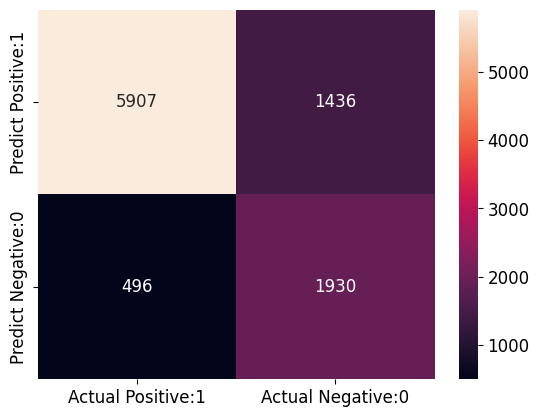

In [114]:
## Visualize


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d')

## Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

### Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

### Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

### f1-score
f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [115]:
from sklearn.metrics import classification_report

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.86      7343
        >50K       0.57      0.80      0.67      2426

    accuracy                           0.80      9769
   macro avg       0.75      0.80      0.76      9769
weighted avg       0.84      0.80      0.81      9769



In [132]:
y_pred_prob = gnb.predict_proba(X_test)[0:100]

In [133]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['<=50K', '>50K'])

y_pred_prob_df


,<=50K,>50K
0,1.000000e+00,4.848853e-09
1,9.999996e-01,3.609199e-07
2,2.999688e-01,7.000312e-01
3,1.558894e-53,1.000000e+00
4,9.999735e-01,2.649479e-05
...,...,...
95,1.000000e+00,2.599795e-09
96,1.167702e-01,8.832298e-01
97,1.818023e-05,9.999818e-01
98,9.244552e-01,7.554484e-02


In [135]:
gnb.predict_proba(X_test)[0:100, 1]

array([4.84885258e-09, 3.60919870e-07, 7.00031238e-01, 1.00000000e+00,
       2.64947931e-05, 1.88554623e-06, 1.00000000e+00, 8.63009126e-05,
       1.68496435e-08, 9.96958788e-01, 9.99999988e-01, 4.30578803e-05,
       9.41027233e-01, 9.04231570e-04, 3.37000975e-09, 5.70735063e-02,
       1.19162681e-01, 8.81946171e-02, 6.30175113e-11, 6.41833697e-05,
       3.29627399e-06, 1.93628641e-08, 4.00546747e-02, 9.74019541e-01,
       6.69837966e-08, 1.29047638e-06, 2.05907908e-02, 9.99436871e-01,
       1.00000000e+00, 9.70599549e-01, 1.00000000e+00, 9.99904799e-01,
       1.77095243e-02, 6.23125520e-08, 9.99954525e-01, 1.00000000e+00,
       1.00000000e+00, 3.33325986e-08, 1.40535237e-03, 9.88928504e-01,
       2.09619538e-03, 3.63315774e-01, 6.36976442e-01, 4.38304289e-07,
       9.78875958e-01, 9.93447499e-01, 2.36034208e-01, 9.99245110e-01,
       1.24917122e-06, 4.96129240e-06, 1.01786619e-04, 2.53097636e-07,
       1.00000000e+00, 9.36152500e-01, 6.36124219e-02, 1.18144880e-06,
      

In [142]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]

In [143]:
y_pred1

array([4.84885258e-09, 3.60919870e-07, 7.00031238e-01, ...,
       3.81536563e-07, 4.61629106e-02, 5.54530802e-10], shape=(9769,))

## ROC Curve

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

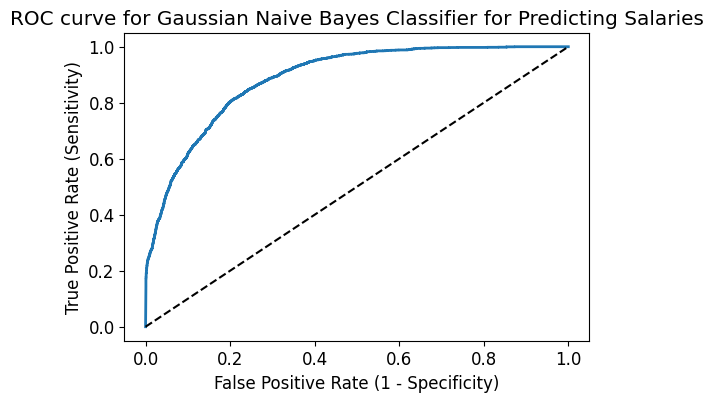

In [145]:
# plot ROC Curve

from sklearn.metrics import roc_curve

# Get the actual positive label from the data
positive_label = y_test.unique()[1] if len(y_test.unique()) > 1 else y_test.unique()[0]

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=positive_label)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()